
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

In [7]:
import pandas as pd

In [654]:
from collections import Counter

In [527]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/customer-shopping-trends-dataset")

print("Path to dataset files:", path)



100%|█████████████████████████████████████████| 146k/146k [00:00<00:00, 309kB/s]

Extracting files...
Path to dataset files: /Users/olga/.cache/kagglehub/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/versions/2


In [11]:
shopping = pd.read_csv('/Users/olga/.cache/kagglehub/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/versions/2/shopping_trends_updated.csv', index_col = 0)

In [21]:
shopping

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly


In [25]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 1 to 3900
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Item Purchased          3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Location                3900 non-null   object 
 6   Size                    3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   int64

In [29]:
shopping.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [31]:
shopping.Category.value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [27]:
shopping.describe(include = ['object'])

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


In [15]:
shopping['Shipping Type'].value_counts()

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

In [ ]:
## Гипотезы  Весной чаще заказывают голубые, розовые, зеленые цвета
## Категория Старые + чаще платит наличными, чем молодые
## Мужчины реже покупают Outerwear  весной и летом, чем женщины
##  Молодые люди чаще используют промокоды чем старые
## Средняя разница между заказами у молодых женщин меньше, чем у молодых мужчин
##  Кол-во заказов у женщин коррелирует с возрастом

In [696]:
shopping['Color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [ ]:
 #Гипотеза 1  Весной чаще заказывают голубые, розовые, зеленые цвета
# НЕВЕРНО Среднее по цвету = 4 %, из этих цветов только розовый цвет заказывают больше чем в срднем -  4.4% 

In [670]:
pivot_table = pd.crosstab(shopping['Color'], shopping[shopping.Season == 'Spring']['Season'])

In [702]:
pivot_table['Spring'].loc[['Blue', 'Pink', 'Green']]/pivot_table['Spring'].sum()

Color
Blue     0.039039
Pink     0.044044
Green    0.038038
Name: Spring, dtype: float64

In [694]:
(pivot_table['Spring']/pivot_table['Spring'].sum()).mean()

0.04

In [710]:
 # Категория Старые + чаще платит наличными, чем молодые

In [718]:
percentile_25 = np.percentile(shopping.Age, 25)
percentile_75 = np.percentile(shopping.Age, 75)

In [724]:
percentile_75

57.0

In [728]:
shopping.loc[ shopping.Age < percentile_25, 'Age_category'] =  'молодые'
shopping.loc[ shopping.Age > percentile_75, 'Age_category'] =  'старые'
shopping.loc[ (shopping.Age <= percentile_75 ) & (shopping.Age >= percentile_25), 'Age_category'] =  'средние'

In [736]:
shopping[shopping.Age_category == 'молодые']['Payment Method'].value_counts()

Payment Method
Cash             172
Credit Card      161
Bank Transfer    157
Debit Card       156
PayPal           154
Venmo            149
Name: count, dtype: int64

In [752]:
shopping[shopping.Age_category !=  'средние'].reset_index().groupby(['Age_category', 'Payment Method']).count()['Customer ID']

Age_category  Payment Method
молодые       Bank Transfer     157
              Cash              172
              Credit Card       161
              Debit Card        156
              PayPal            154
              Venmo             149
старые        Bank Transfer     146
              Cash              166
              Credit Card       177
              Debit Card        149
              PayPal            151
              Venmo             155
Name: Customer ID, dtype: int64

/var/folders/bh/jgpwctpd0dj1mw6n9wsqjmxc0000gr/T/ipykernel_34224/375985076.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


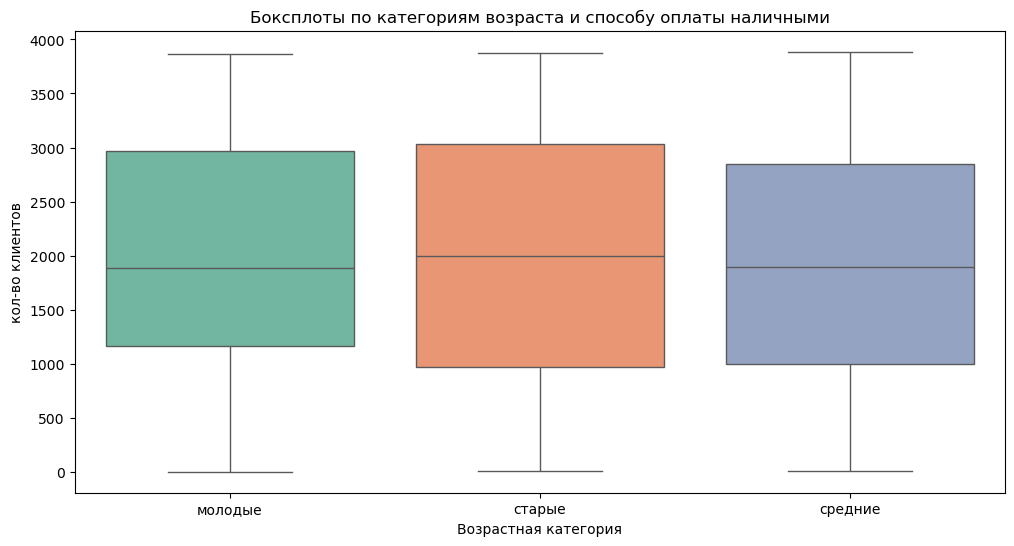

In [768]:

filtered_data = shopping[shopping['Payment Method'] == 'Cash']
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_data,
    x='Age_category',
    y='Customer ID',
    palette='Set2'
)
plt.title('Боксплоты по категориям возраста и способу оплаты наличными')
plt.xlabel('Возрастная категория')
plt.ylabel('кол-во клиентов')

plt.show()


In [846]:
#  Молодые люди чаще используют промокоды чем старые, неверно - нет разницы


In [840]:
 shopping.Age_category.value_counts()  # молодые и старые уравновешенные категории значит можно не перенормировать

Age_category
средние    2007
молодые     949
старые      944
Name: count, dtype: int64

/var/folders/bh/jgpwctpd0dj1mw6n9wsqjmxc0000gr/T/ipykernel_34224/3585676741.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


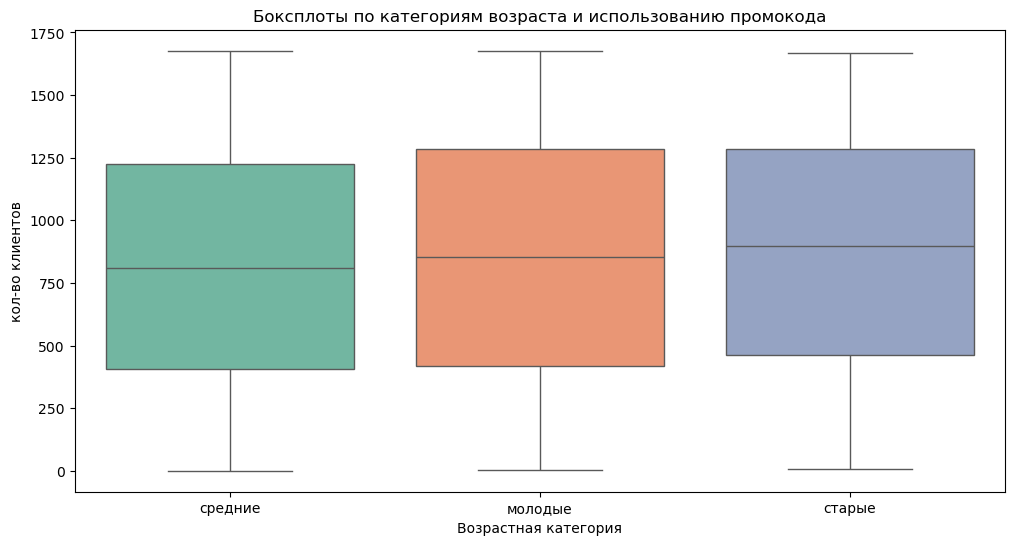

In [844]:

filtered_data = shopping[shopping['Promo Code Used'] == 'Yes']
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_data,
    x='Age_category',
    y='Customer ID',
    palette='Set2'
)
plt.title('Боксплоты по категориям возраста и использованию промокода')
plt.xlabel('Возрастная категория')
plt.ylabel('кол-во клиентов')

plt.show()


In [818]:
#Мужчины реже покупают Outerwear  весной и летом, чем женщины Небольшая тенденция есть

In [820]:
outerwear_perc = shopping[(shopping.Category == 'Outerwear')  &  (shopping.Season.isin(['Summer', 'Spring']))].Gender.value_counts() /  shopping.Gender.value_counts()

In [822]:
pd.DataFrame(outerwear_perc)

,count
Gender,
Male,0.038462
Female,0.043269


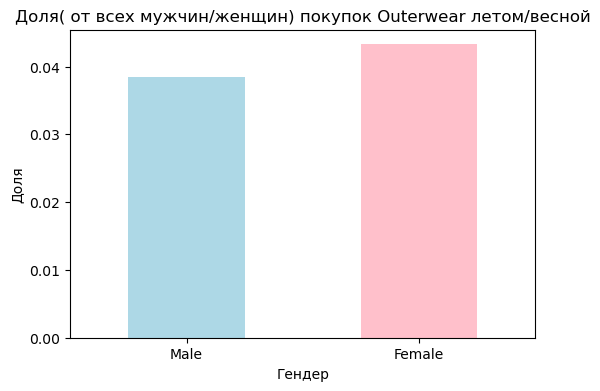

In [824]:
outerwear_perc.plot(
    kind='bar', 
    x='Gender', 
    y='Percentage', 
    color=['lightblue', 'pink'], 
    figsize=(6, 4), 
    title='Доля( от всех мужчин/женщин) покупок Outerwear летом/весной'
)
plt.ylabel('Доля')
plt.xlabel('Гендер')
plt.xticks(rotation=0)
plt.show()


In [830]:
#Кол-во заказов у женщин коррелирует с возрастом, неверно у нас никакие  величины не коррелируют 

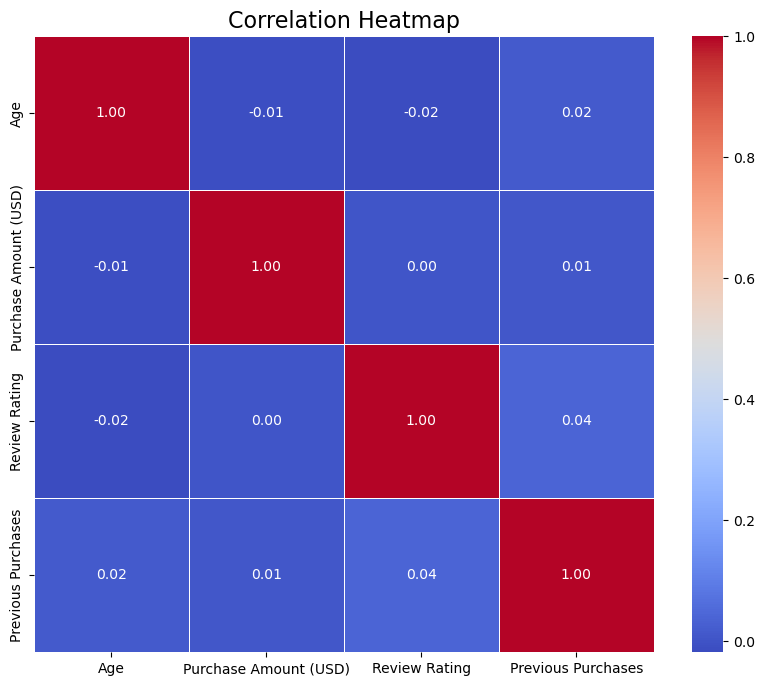

In [832]:
numeric_columns =  shopping[shopping.Gender == 'Female'].select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [950]:
#Средняя разница между заказами у молодых женщин меньше, чем у молодых мужчин
#  НЕТ, и вообще по кумулятивному графику видно, что данные  скорее всего искуственно сгенерированы

In [952]:
Percent_of_freq = (shopping[shopping.Age_category == 'молодые'].reset_index().groupby(['Gender', 'Frequency of Purchases']).count() ['Customer ID'])/ shopping[shopping.Age_category == 'молодые'].value_counts('Gender')

In [954]:
Percent_of_freq['Female'] 

Frequency of Purchases
Annually          0.125424
Bi-Weekly         0.179661
Every 3 Months    0.155932
Fortnightly       0.142373
Monthly           0.111864
Quarterly         0.176271
Weekly            0.108475
dtype: float64

In [956]:
Percent_of_freq_df  = pd.DataFrame(Percent_of_freq).reset_index().rename(columns = {0 : 'percent' })

In [958]:
Percent_of_freq_df  

,Gender,Frequency of Purchases,percent
0,Female,Annually,0.125424
1,Female,Bi-Weekly,0.179661
2,Female,Every 3 Months,0.155932
3,Female,Fortnightly,0.142373
4,Female,Monthly,0.111864
5,Female,Quarterly,0.176271
6,Female,Weekly,0.108475
7,Male,Annually,0.133028
8,Male,Bi-Weekly,0.160550
9,Male,Every 3 Months,0.151376


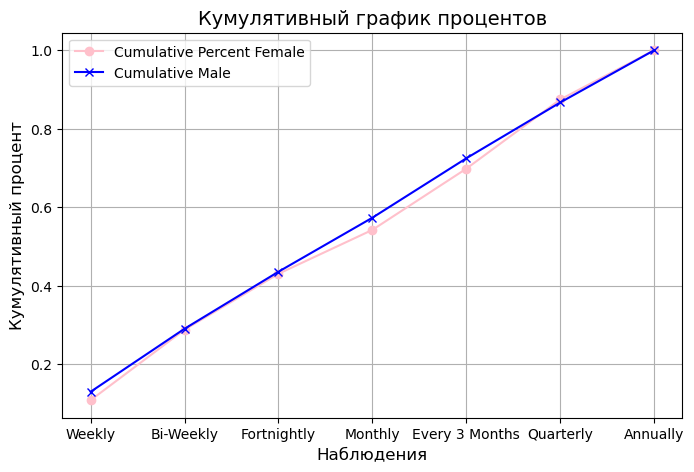

In [964]:


data_female=  Percent_of_freq_df[Percent_of_freq_df.Gender == 'Female'].set_index('Frequency of Purchases').loc[['Weekly', 'Bi-Weekly', 'Fortnightly','Monthly', 'Every 3 Months','Quarterly', 'Annually' ]] 
data_male=  Percent_of_freq_df[Percent_of_freq_df.Gender == 'Male'].set_index('Frequency of Purchases').loc[['Weekly', 'Bi-Weekly', 'Fortnightly','Monthly', 'Every 3 Months','Quarterly', 'Annually' ]]
data_female['cumulative_percent'] = data_female['percent'].cumsum()
data_male['cumulative_percent'] = data_male['percent'].cumsum()


plt.figure(figsize=(8, 5))
plt.plot(data_female['cumulative_percent'], label='Cumulative Percent Female', marker='o', color = 'pink')
plt.plot(data_male['cumulative_percent'], label='Cumulative Male', marker='x', color = 'blue')

plt.title('Кумулятивный график процентов', fontsize=14)
plt.xlabel('Наблюдения', fontsize=12)
plt.ylabel('Кумулятивный процент', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


<Axes: xlabel='Frequency of Purchases', ylabel='percent'>

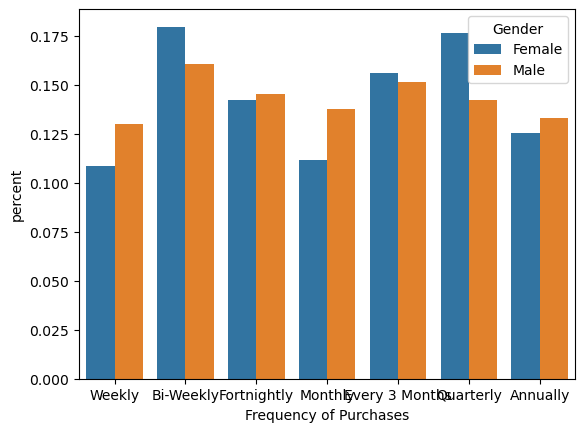

In [962]:
sns.barplot( Percent_of_freq_df, x="Frequency of Purchases", y="percent", hue="Gender", order = ['Weekly', 'Bi-Weekly', 'Fortnightly', 
                                                                                              'Monthly', 'Every 3 Months','Quarterly', 'Annually'  ])

<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 

Самые популярные товары Blouse, Jewelry, Pants 

In [473]:
shopping['Item Purchased'].value_counts().head(5)

Item Purchased
Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: count, dtype: int64

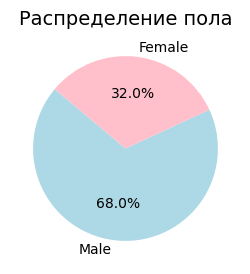

In [521]:

plt.figure(figsize=(3, 3))
plt.pie(
    shopping.Gender.value_counts(), 
    labels=shopping.Gender.value_counts().index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['lightblue', 'pink'] ) 
plt.title('Распределение пола', fontsize=14)
plt.show()


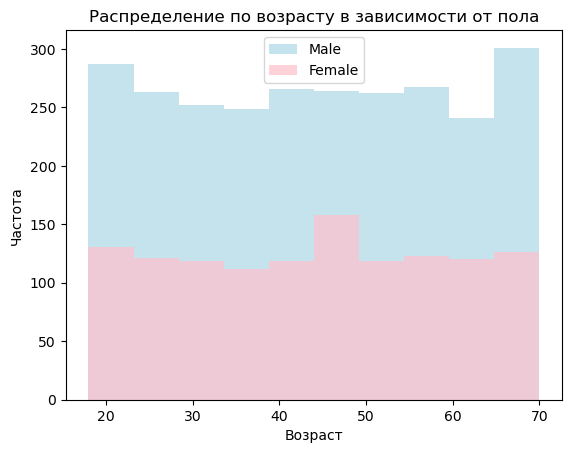

In [505]:
fig, ax = plt.subplots()
ax.hist(shopping[shopping.Gender == 'Male'].Age, color='lightblue', alpha=0.7, label='Male')
ax.hist(shopping[shopping.Gender == 'Female'].Age, color='pink', alpha=0.7, label='Female')
ax.legend()
ax.set_title('Распределение по возрасту в зависимости от пола')
ax.set_xlabel('Возраст')
ax.set_ylabel('Частота')
plt.show()


In [537]:
pivot_table = pd.crosstab(shopping['Color'], shopping['Season'])


In [541]:
pivot_table

Season,Fall,Spring,Summer,Winter
Color,,,,
Beige,34,39,37,37
Black,42,43,42,40
Blue,32,39,46,35
Brown,35,33,33,40
Charcoal,32,42,36,43
Cyan,43,42,42,39
Gold,36,38,30,34
Gray,44,48,40,27
Green,37,38,44,50


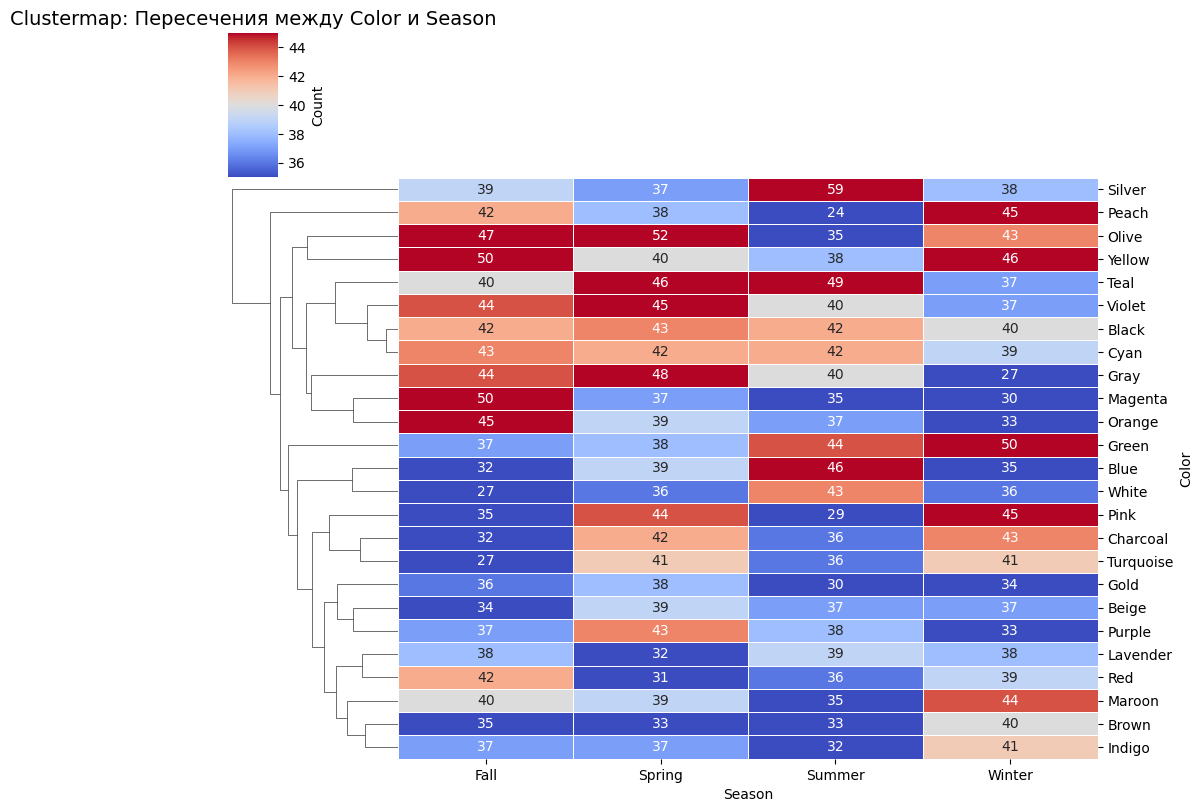

In [585]:
pivot_table = pd.crosstab(shopping['Color'], shopping['Season'])


sns.clustermap(
    pivot_table, 
     vmin=35, 
   vmax = 45, 
    cmap='coolwarm',  
    figsize=(10, 8),
    annot=True, 
    linewidths=0.5,
     col_cluster=False,
    cbar_kws={'label': 'Count'} , 
     #z_score= 0
)


plt.title("Clustermap: Пересечения между Color и Season", fontsize=14)
plt.show()


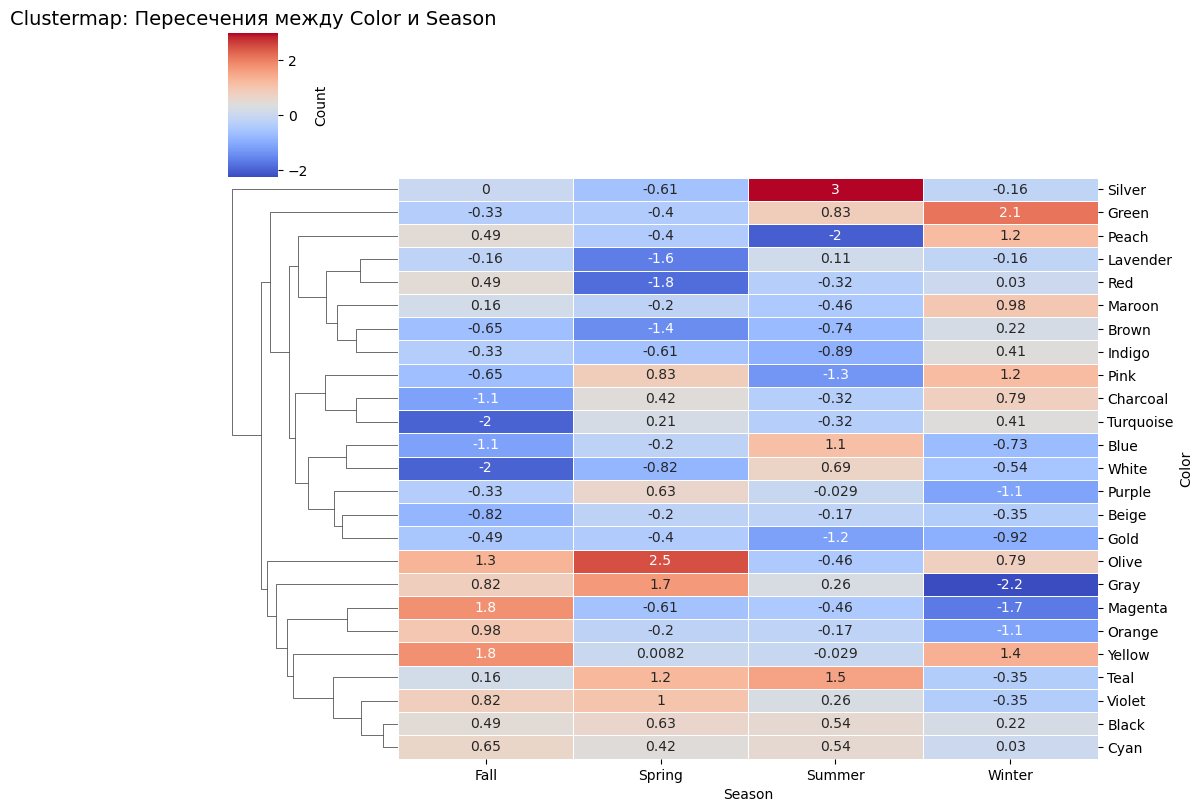

In [581]:
pivot_table = pd.crosstab(shopping['Color'], shopping['Season'])


sns.clustermap(
    pivot_table, 
    # vmin=35, 
    # vmax = 45, 
    cmap='coolwarm',  
    figsize=(10, 8),
    annot=True, 
    linewidths=0.5,
     col_cluster=False,
    cbar_kws={'label': 'Count'} , 
     z_score= 1
)

plt.title("Clustermap: Пересечения между Color и Season", fontsize=14)
plt.show()


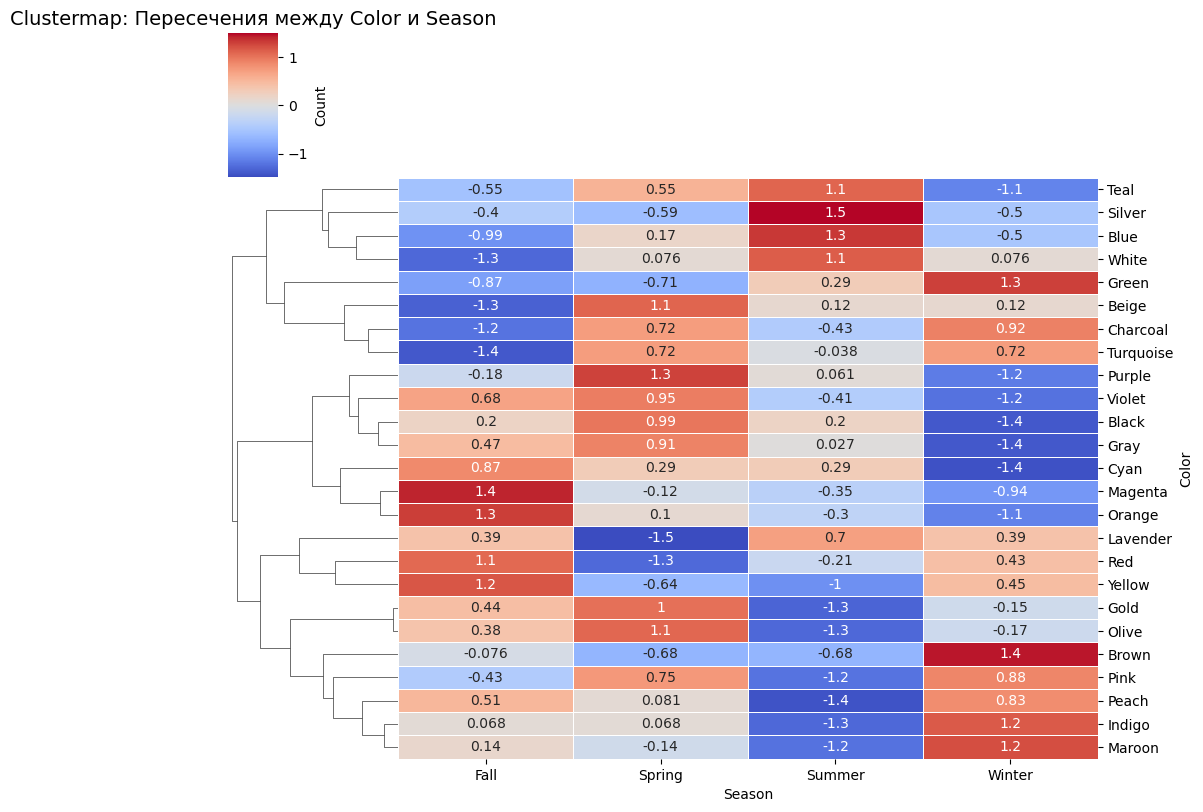

In [569]:
pivot_table = pd.crosstab(shopping['Color'], shopping['Season'])


sns.clustermap(
    pivot_table, 
    # vmin=35, 
    # vmax = 45, 
    cmap='coolwarm',  
    figsize=(10, 8),
    annot=True, 
    linewidths=0.5,
     col_cluster=False,
    cbar_kws={'label': 'Count'} , 
     z_score= 0
)

plt.title("Clustermap: Пересечения между Color и Season", fontsize=14)
plt.show()


In [640]:
mau.loc[season_order]

Season
Winter    971
Spring    999
Summer    955
Fall      975
Name: Customer ID, dtype: int64

/var/folders/bh/jgpwctpd0dj1mw6n9wsqjmxc0000gr/T/ipykernel_34224/3437772337.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mau.index, y=mau.values, palette='coolwarm', order=season_order)


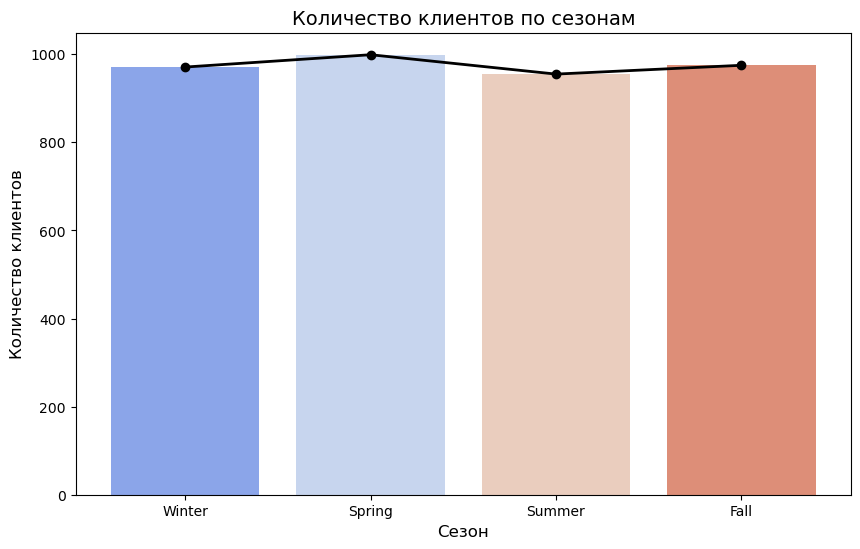

In [642]:

season_order = ['Winter', 'Spring', 'Summer', 'Fall']


mau = shopping.reset_index().groupby('Season').count()['Customer ID'].loc[season_order]


plt.figure(figsize=(10, 6))
sns.barplot(x=mau.index, y=mau.values, palette='coolwarm', order=season_order)
plt.plot(mau.index, mau.values, color='black', marker='o', linestyle='-', linewidth=2)

plt.title('Количество клиентов по сезонам', fontsize=14)
plt.xlabel('Сезон', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)

plt.show()



In [650]:
cl_list = shopping[shopping.Category ==  'Clothing']['Item Purchased'].unique()

In [656]:
all_letters = ''.join(cl_list).replace('-', '').lower()  
letter_counts = Counter(all_letters)


In [668]:
letter_counts.most_common()[0]

('s', 13)

<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [248]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top_countries(df, title):
    """
    Строит барплот для стран с данными о потреблении алкоголя.
    Параметры:
        df (DataFrame): Датафрейм, содержащий колонки 'beer_servings', 'spirit_servings', 'wine_servings', 'country'.
        title (str): Заголовок графика.
    """

    x = np.arange(len(df))
    width = 0.2


    beer_color = '#F1C27D' 
    spirit_color = '#6EC1E4' 
    wine_color = '#9B2D20'  

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(x - width, df['beer_servings'], width, color=beer_color, label='Beer Servings')
    ax.bar(x, df['spirit_servings'], width, color=spirit_color, label='Spirit Servings')
    ax.bar(x + width, df['wine_servings'], width, color=wine_color, label='Wine Servings')

 
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Countries', fontsize=12)
    ax.set_ylabel('Servings', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(df['country'], rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()




In [250]:
drinks = pd.read_csv('drinks.csv' )

Видим что средний объем употребляемого вина меньше, чем  пива или спирта на всех промежуточных точках, посмотрим на визуализацию.

посмотрим на данные в общем, видим, что   вино пьют в меньшем колличестве, чем спирт  и больше всего пьют пиво

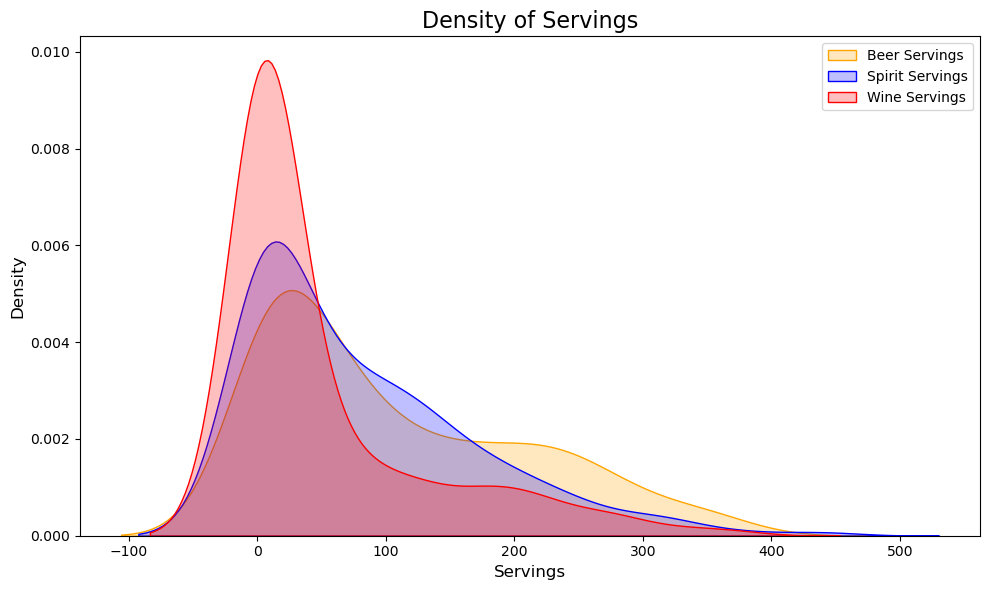

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(drinks['beer_servings'], color='orange', label='Beer Servings', ax=ax, fill=True)

sns.kdeplot(drinks['spirit_servings'], color='blue', label='Spirit Servings', ax=ax, fill=True)


sns.kdeplot(drinks['wine_servings'], color='red', label='Wine Servings', ax=ax, fill=True)

ax.set_title('Density of Servings', fontsize=16)
ax.set_xlabel('Servings', fontsize=12)  
ax.set_ylabel('Density', fontsize=12)
ax.legend()


plt.tight_layout()
plt.show()


Посмотрим как коррелируют наши значения между собой, видим, что употребление чистого алкоголя выше коррелирует с употреблением пива,
чем спирта, хотя я ожидала наоборот.   Связь между употреблением  вина и спирта слабее, чем между употреблением пива и спирта, что звучит логично.

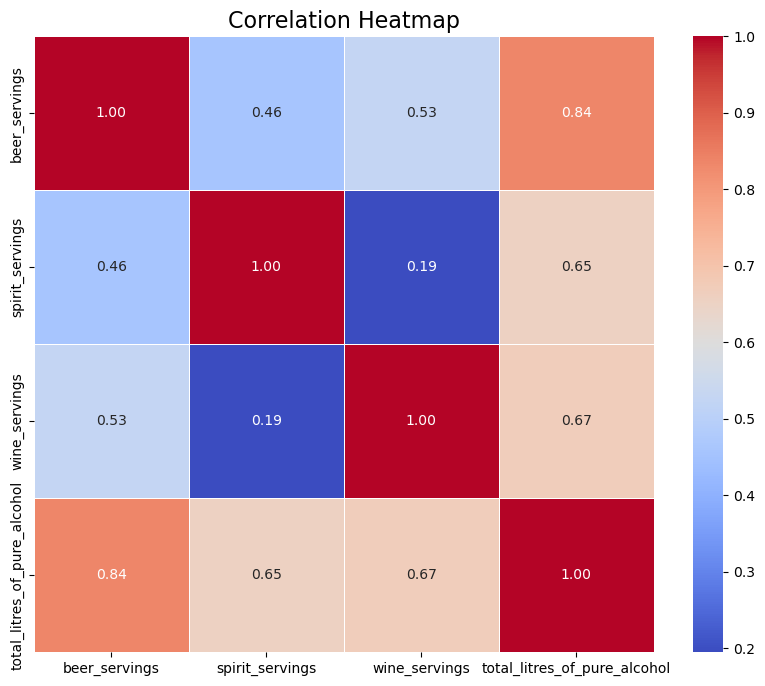

In [258]:



numeric_columns = drinks.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [260]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


Посмотрим на топ 5 стран по употреблению чистого алкоголя,  интересно, что первая оказалась Беларусь с основным напитком - водкой.
Интересно будет сравнить ее с Россией должны быть похожие доли алкоголя в употреблении.

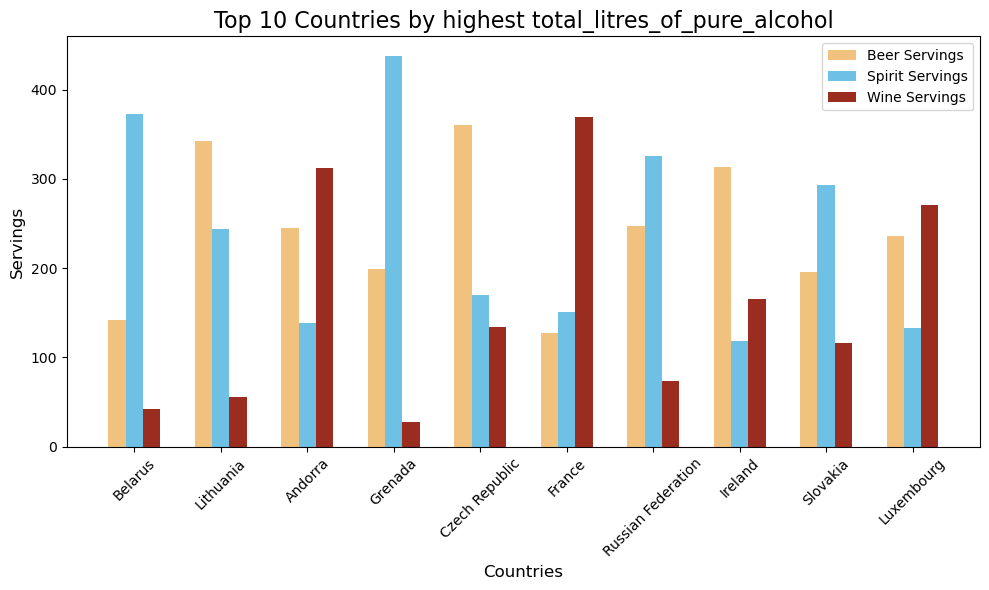

In [295]:
top_10_countries = drinks.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10)
plot_top_countries(top_10_countries, 'Top 10 Countries by highest total_litres_of_pure_alcohol')

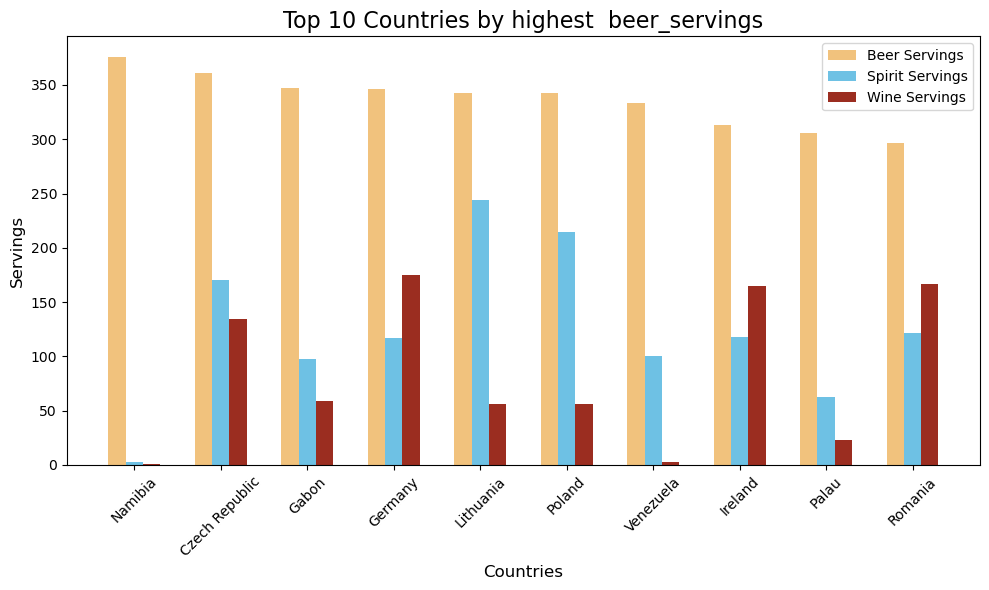

In [293]:
top_10_beer_countries = drinks.sort_values(by='beer_servings', ascending=False).head(10)
plot_top_countries(top_10_beer_countries, 'Top 10 Countries by highest  beer_servings')

Лидеры по употреблению вина ожидаемы, никого неожиданного нет

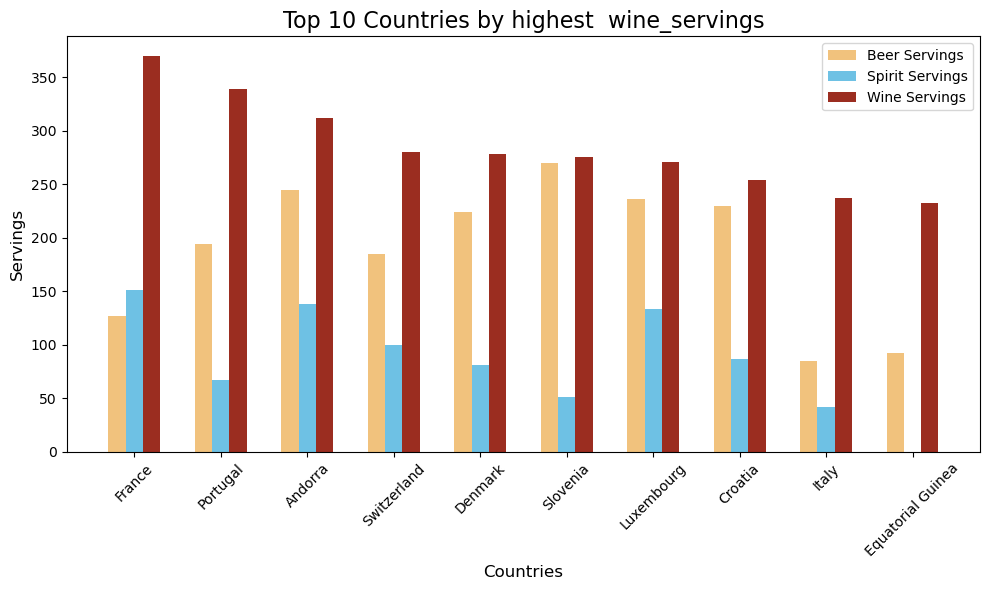

In [291]:
top_10_wine_countries = drinks.sort_values(by='wine_servings', ascending=False).head(10)
plot_top_countries(top_10_wine_countries, 'Top 10 Countries by highest  wine_servings')

Интересно, что кроме ожидаемых в топе по употреблению спирта России и Белорусси в список также попали Гренада, Гаити, Сент-Люсия и Доминика из Карибского региона

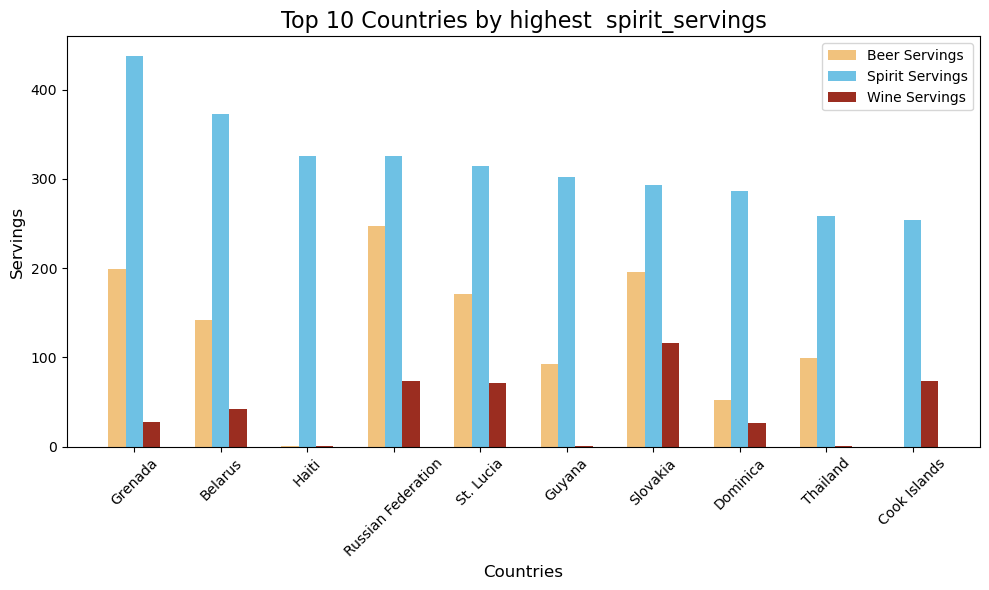

In [297]:
top_10_spirit_countries = drinks.sort_values(by='spirit_servings', ascending=False).head(10)
plot_top_countries(top_10_spirit_countries, 'Top 10 Countries by highest  spirit_servings')

На страны не употребляющие вообще пока посмотрим в числовом формате их 13. В основном это страны, где алкоголь запрещен по религиозным обычиям. Так же в основном это страны с низким уровнем жизни или закрытые( например Сомали, Северная Корея) и возможно там статистика собиралась не так тщательно  

In [308]:
len(drinks[drinks.total_litres_of_pure_alcohol == 0])

13

In [310]:
drinks[drinks.total_litres_of_pure_alcohol == 0].country

0           Afghanistan
13           Bangladesh
46          North Korea
79                 Iran
90               Kuwait
97                Libya
103            Maldives
106    Marshall Islands
107          Mauritania
111              Monaco
128            Pakistan
147          San Marino
158             Somalia
Name: country, dtype: object

Интересно посмотреть на страны где употребляют меньше всего алкоголя, но не 0. Это опять страны, где алкоголь запрещен по религиозным обычиям или страны с низким уровнем жизни. Так же стоит заметить, что это жаркие страны.

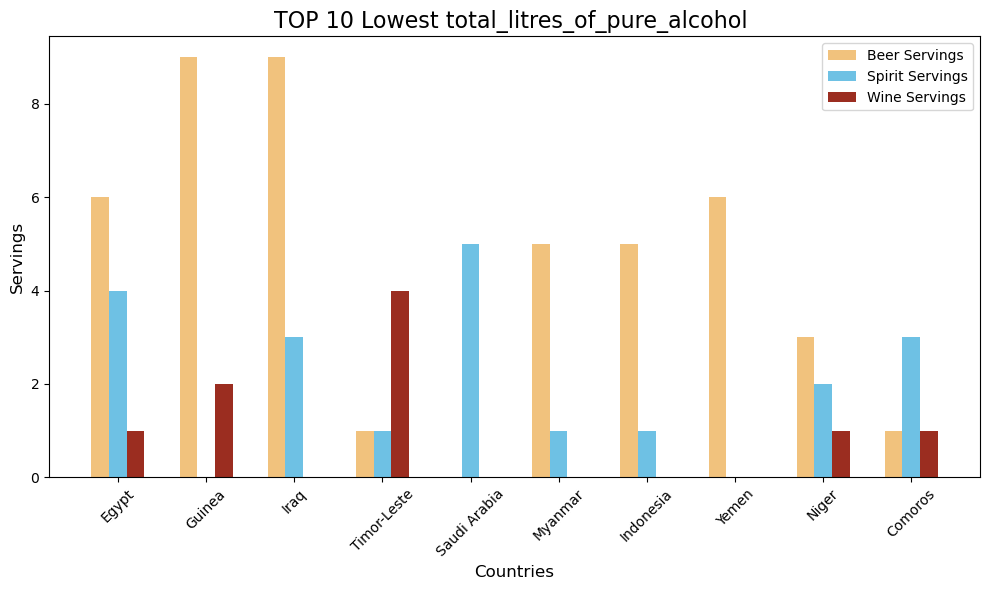

In [319]:
low_10= drinks[drinks.total_litres_of_pure_alcohol != 0].sort_values(by='total_litres_of_pure_alcohol', ascending=False).tail(10)
plot_top_countries(low_10,  'TOP 10 Lowest total_litres_of_pure_alcohol ')

Страны, где спирт употребляют меньше всего - в основном Афиканские

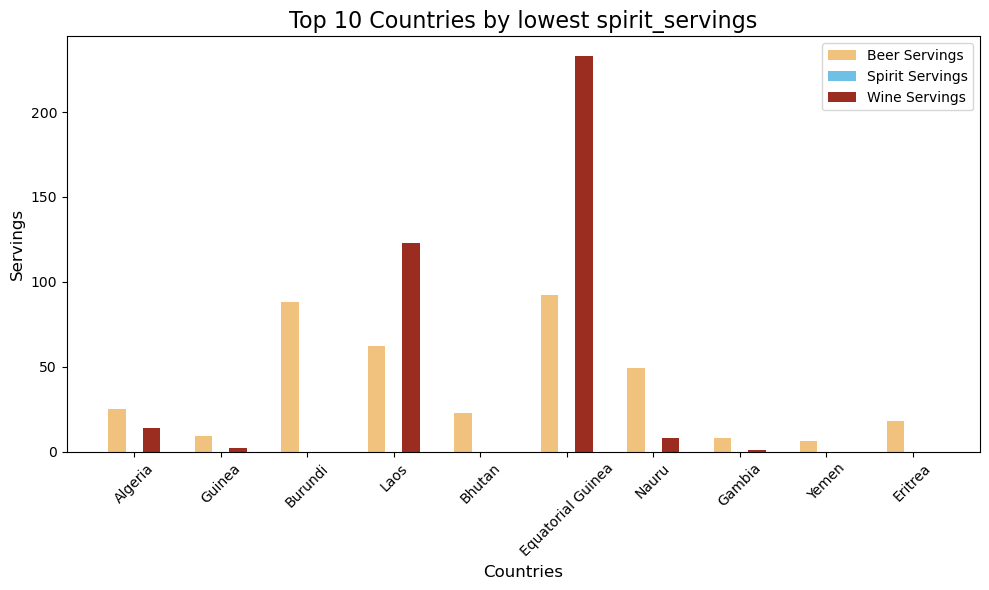

In [328]:
top_10 = drinks[drinks.total_litres_of_pure_alcohol != 0].sort_values(by='spirit_servings', ascending=False).tail(10)
plot_top_countries(top_10, 'Top 10 Countries by lowest spirit_servings')

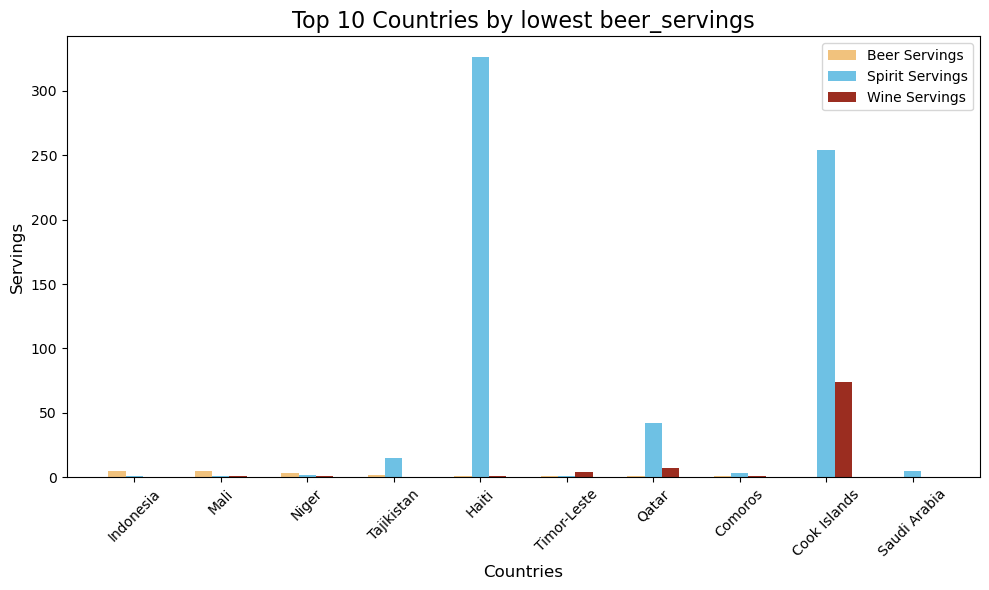

In [330]:
top_10 = drinks[drinks.total_litres_of_pure_alcohol != 0].sort_values(by='beer_servings', ascending=False).tail(10)
plot_top_countries(top_10, 'Top 10 Countries by lowest beer_servings')

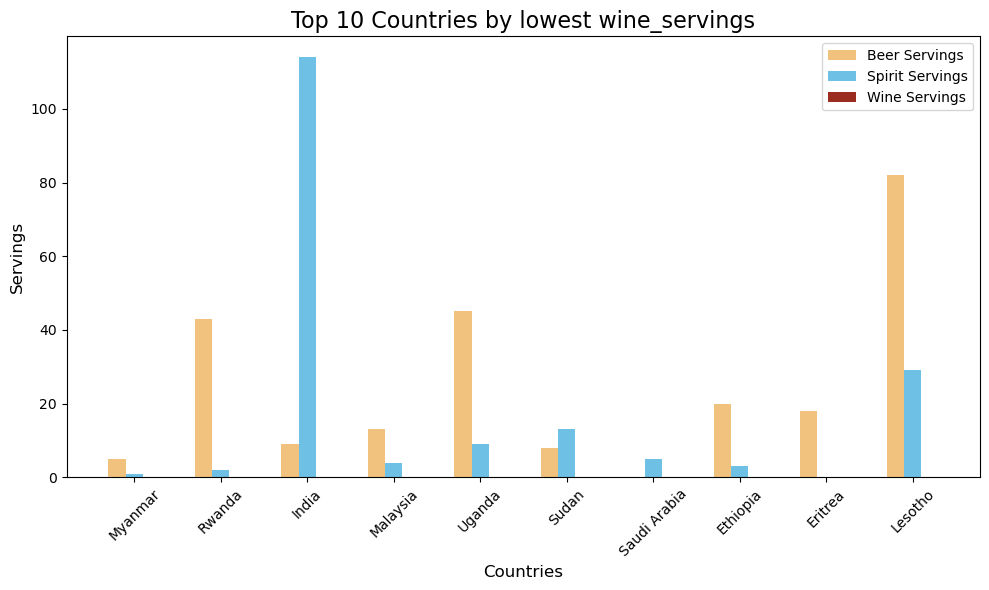

In [332]:
top_10 = drinks[drinks.total_litres_of_pure_alcohol != 0].sort_values(by='wine_servings', ascending=False).tail(10)
plot_top_countries(top_10, 'Top 10 Countries by lowest wine_servings')

<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 

In [426]:
tarant = pd.read_csv('tarantino.csv')

In [452]:
tarant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


In [454]:
tarant.describe()

,minutes_in
count,1894.000000
mean,71.529071
std,45.075036
min,0.400000
25%,29.655000
50%,70.525000
75%,112.835000
max,160.450000


In [428]:
tarant['type'].value_counts()

type
word     1704
death     190
Name: count, dtype: int64

In [430]:

summary = tarant.groupby(["movie", "type"]).size().unstack(fill_value=0)

In [432]:
summary 

type,death,word
movie,,
Django Unchained,47,262
Inglorious Basterds,48,58
Jackie Brown,4,368
Kill Bill: Vol. 1,63,57
Kill Bill: Vol. 2,11,69
Pulp Fiction,7,469
Reservoir Dogs,10,421


In [434]:

summary = tarant.groupby(["movie", "type"]).size().unstack(fill_value=0)

summary["ratio"] = summary["word"] / (summary["death"] + 1e-6) 
summary = summary.reset_index()


In [436]:
summary

type,movie,death,word,ratio
0,Django Unchained,47,262,5.574468
1,Inglorious Basterds,48,58,1.208333
2,Jackie Brown,4,368,91.999977
3,Kill Bill: Vol. 1,63,57,0.904762
4,Kill Bill: Vol. 2,11,69,6.272727
5,Pulp Fiction,7,469,66.999990
6,Reservoir Dogs,10,421,42.099996


<Figure size 1000x600 with 0 Axes>

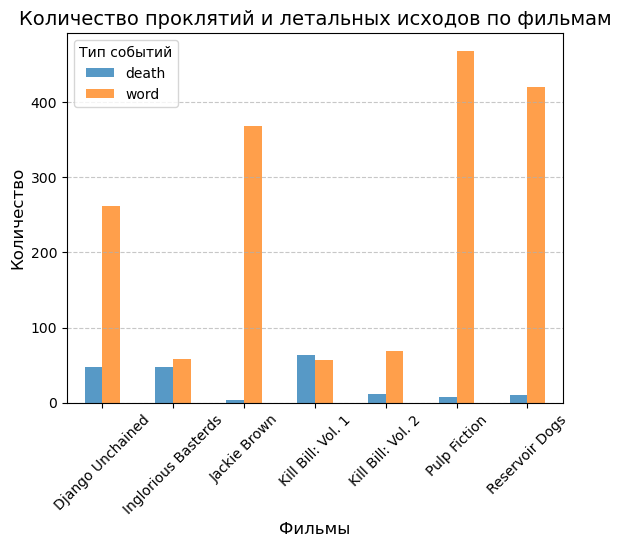

/var/folders/bh/jgpwctpd0dj1mw6n9wsqjmxc0000gr/T/ipykernel_34224/1414438290.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="movie", y="ratio", data=summary.sort_values('ratio'), palette="coolwarm")


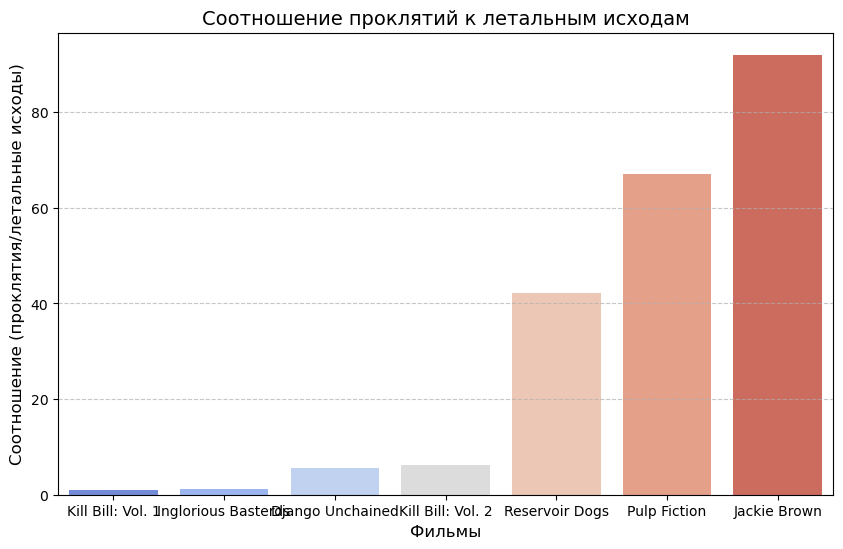

In [440]:
plt.figure(figsize=(10, 6))
summary.set_index("movie")[['death','word']].plot(kind="bar", stacked=False, alpha=0.75)
plt.title("Количество проклятий и летальных исходов по фильмам", fontsize=14)
plt.xlabel("Фильмы", fontsize=12)
plt.ylabel("Количество", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Тип событий")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x="movie", y="ratio", data=summary.sort_values('ratio'), palette="coolwarm")
plt.title("Соотношение проклятий к летальным исходам", fontsize=14)
plt.xlabel("Фильмы", fontsize=12)
plt.ylabel("Соотношение (проклятия/летальные исходы)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [442]:
word_freq = tarant.word.value_counts()/tarant.word.value_counts().sum()

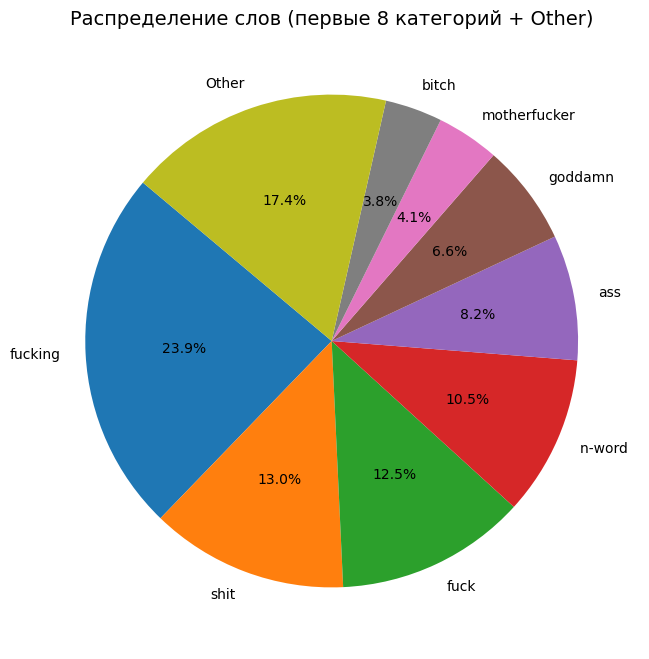

In [450]:
top_categories = word_freq[:8]

other_categories = word_freq[8:].sum()
final_freq = pd.concat([top_categories, pd.Series({"Other": other_categories})])

plt.figure(figsize=(8, 8))
plt.pie(
    final_freq, 
    labels=final_freq.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab10.colors
)
plt.title("Распределение слов (первые 8 категорий + Other)", fontsize=14)
plt.show()


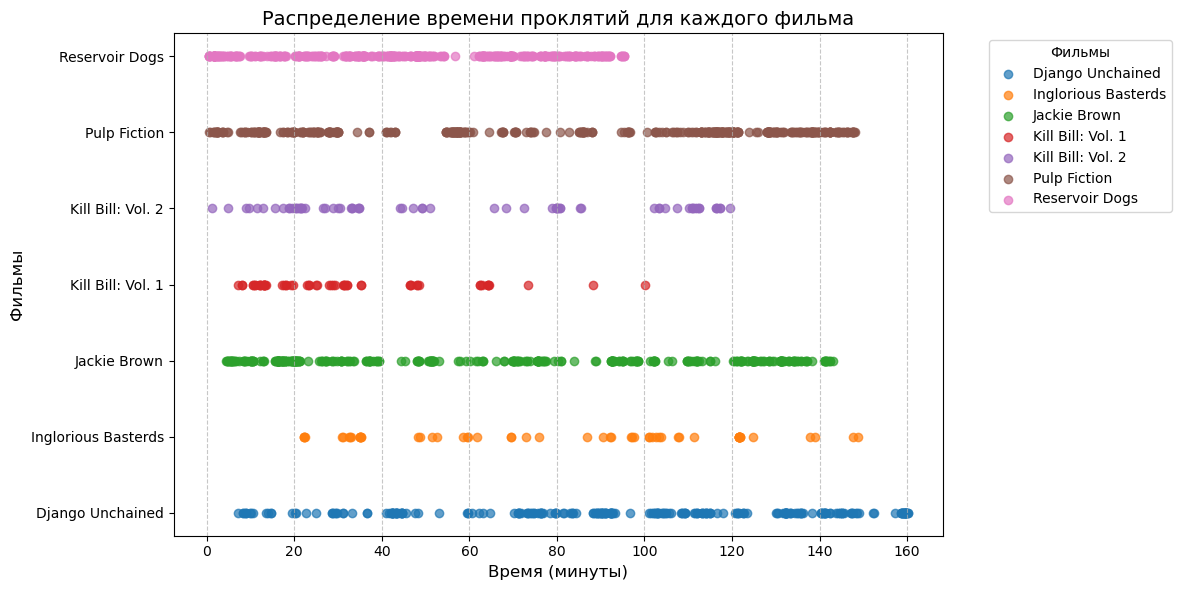

In [464]:
import matplotlib.pyplot as plt

curses = tarant[tarant["type"] == "word"]


plt.figure(figsize=(12, 6))


for movie, group in curses.groupby("movie"):
    plt.scatter(group["minutes_in"], [movie] * len(group), label=movie, alpha=0.7)

plt.title("Распределение времени проклятий для каждого фильма", fontsize=14)
plt.xlabel("Время (минуты)", fontsize=12)
plt.ylabel("Фильмы", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title="Фильмы", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
